# Imports

In [1]:
import numpy as np
import pandas as pd
from time import time

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

%matplotlib inline
import matplotlib.pyplot as plt

import os
import cv2
import PIL
from PIL import Image

from tensorflow.keras.optimizers import Adam


# Load the data

In [2]:
def read_images(root_image_path):
    labels = np.array    
    features = []
    # length = len(os.listdir(root_image_path))       # length should be like 67484 

    length = []      # length should be like 67484 
    count = 0
    counter = 0
    totalCount = 0
    # for subdir, dirs, files in os.walk(root_image_path):    
        # print(subdir, dirs, files)

    dirs = os.listdir(root_image_path)
    # for x in os.walk(root_image_path)[1]:
    #     dirs = x[1]

    print(dirs)


    for dir in dirs:
        length.append(len(os.listdir(root_image_path + str(dir))))
        labels = np.append(labels, dir) 
            
        # print(length, len(labels))

    print(sum(length))

    # for i in range(len(dirs)):
    #     for root, _, files in os.walk(root_image_path + str(dirs[i])):
    #         for image in files:
    #             features.append(cv2.imread(os.path.join(root, image)))

    #             if counter == 1000:
    #                 totalCount += counter
    #                 print("images processed: " + str(totalCount))
    #                 counter = 0
                
    #             counter += 1

            # features[i] = features[i].reshape(3, 22500).reshape(3, 150, 150, 1)

                    

    # for i in range(len(features)):
    #     features[i] = features[i].reshape(length[i], 22500).reshape(length[i], 150, 150, 1)
    # features = features.reshape(length[i], 22,500).reshape(length[i], 150, 150, 1)

            

        

    # gets the lables and features from the directory path
    # the images are labeled by directory-structure.
    # with open(root_image_path, 'rb') as imagePath:
        

    #         # labels = np.append(labels, dir)
    #         features = np.frombuffer(cv2.imread(os.path.join(subdir, image)), dtype=np.uint8, offset=16).reshape(length, 784).reshape(length, 28, 28, 1)

    #         if count > 2000:
    #             break

    #         count +=1
    return features, labels



In [3]:
# features, labels = read_images('C:/Users/samra/OneDrive/CompSciUni/Year4/Project/images_chess_pieces/')

In [4]:
# features = []
# # for root, _, files in os.walk('C:/Users/samra/OneDrive/CompSciUni/Year4/Project/images_chess_pieces/bB'):
# #     for image in files:
# features.append(cv2.imread('C:/Users/samra/OneDrive/CompSciUni/Year4/Project/images_chess_pieces/bB/_board_1344.jpg_0_300.jpg'))
# print(features)


In [5]:
labels = []
root_image_path = 'C:/Users/samra/OneDrive/CompSciUni/Year4/Project/images_chess_pieces/'
dirs = os.listdir(root_image_path)

print(dirs)


for dir in dirs:
    for i in range(len(os.listdir(root_image_path + str(dir)))):
        labels.append(str(dir))

print(len(labels))

['bB', 'bK', 'bN', 'bP', 'bQ', 'bR', 'wB', 'wK', 'wN', 'wP', 'wQ', 'wR', '__']
46369


In [6]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(labels)))])
int_labels = np.asarray([d[x] for x in labels])
int_labels

array([2, 2, 2, ..., 1, 1, 1])

In [7]:
root_image_path = 'C:/Users/samra/OneDrive/CompSciUni/Year4/Project/images_chess_pieces/'
imagePath = 'C:/Users/samra/OneDrive/CompSciUni/Year4/Project/images_chess_pieces/bB/'
length = len(labels)


imageArr = []

# print(files)
dirs = os.listdir(root_image_path)

for dir in dirs:
    imagePath = root_image_path + str(dir) + '/'
    files = os.listdir(imagePath)

    for file in files:
        image = Image.open(imagePath + file)

        imageArr.append(np.asarray(image))

        # resize image and ignore original aspect ratio
        # img_resized = image.resize((50,50))
        # imageArr.append(np.asarray(img_resized))




In [8]:
features = np.asarray(imageArr)
labels = np.asarray(labels)

In [9]:
train = {}
validation = {}
test = {}

train['features'], test['features'], train['labels'], test['labels'] = train_test_split(features, int_labels, test_size=0.15, random_state=0)
train['features'], validation['features'], train['labels'], validation['labels'] = train_test_split(train['features'], train['labels'], test_size=0.2, random_state=0)

In [10]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(labels)))])
int_labels = np.asarray([d[x] for x in labels])
int_labels

array([2, 2, 2, ..., 1, 1, 1])

## Explore the data

In [11]:
print('# of training images:', train['features'].shape[0])
print('# of test images:', test['features'].shape[0])
print('# of validation images:', validation['features'].shape[0])

# of training images: 31530
# of test images: 6956
# of validation images: 7883


In [12]:
def display_image(position):
    image = train['features'][position].squeeze()
    plt.title('Example %d. Label: %s' % (int(position), train['labels'][position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

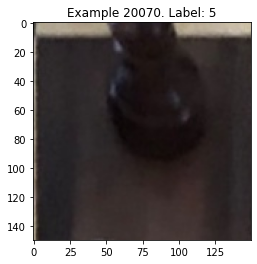

In [13]:
display_image(20070)

In [14]:
train_labels_count = np.unique(train['labels'], return_counts=True)
dataframe_train_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count':train_labels_count[1]})
dataframe_train_labels

,Label,Count
0,1,13192
1,2,1119
2,3,631
3,4,1135
4,5,4641
5,6,513
6,7,1109
7,8,1141
8,9,538
9,10,1150


# Prepare input features

In [15]:
# Pad images with 0s
train['features']      = np.pad(train['features'], ((0,0),(2,2),(2,2),(0,0)), 'constant')
validation['features'] = np.pad(validation['features'], ((0,0),(2,2),(2,2),(0,0)), 'constant')
test['features']       = np.pad(test['features'], ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(train['features'][0].shape))

Updated Image Shape: (154, 154, 3)


# LeNet-5 Implementation

In [16]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)               6

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [19]:
EPOCHS = 10
BATCH_SIZE = 128

In [20]:
X_train, y_train = train['features'], to_categorical(train['labels'])
X_validation, y_validation = validation['features'], to_categorical(validation['labels'])

train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, y_validation, batch_size=BATCH_SIZE)

In [21]:
print('# of training images:', train['features'].shape[0])
print('# of validation images:', validation['features'].shape[0])

steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))


# of training images: 31530
# of validation images: 7883
Epoch 1/10


In [ ]:
model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

In [ ]:
score = model.evaluate(test['features'], to_categorical(test['labels']))
print('Test loss:', score[0])
print('Test accuracy:', score[1])